### Web Scrapping

In [1]:
import requests
from bs4 import BeautifulSoup

# Instagram post URL
post_url = 'https://www.instagram.com/p/CcANpJlKlso/?igsh=aDZ3aDFpYWtwNGNu'

# Make a GET request to the URL
response = requests.get(post_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract text from the post
    post_text = ""
    for p_tag in soup.find_all('meta', property='og:description'):
        post_text += p_tag.get('content') + "\n"

    print(post_text)
else:
    print("Failed to retrieve the page. Status code:", response.status_code)


1M likes, 4,317 comments - thenameisyash on April 6, 2022: "Experience #KGFChapter2 in @IMAX from April 14th worldwide.

#KGF2onApr14

@prashanthneel @vkiragandur @hombalefilms @duttsanjay...". 



Interpretation:

Two methods for extracting data from an Instagram post. The first uses requests and BeautifulSoup to retrieve the post's metadata, specifically the description. The second method employs the instaloader library to download the full post caption. This dual approach showcases different techniques for accessing social media content programmatically, each with its own advantages in terms of the depth and type of information retrieved.

In [4]:
import instaloader

# Create an instance of Instaloader
loader = instaloader.Instaloader()

# Define the Instagram post URL
post_url = 'https://www.instagram.com/p/CcANpJlKlso/?igsh=aDZ3aDFpYWtwNGNu'  

# Extract the shortcode from the URL
shortcode = post_url.split("/")[-2]

# Load the post using the shortcode
post = instaloader.Post.from_shortcode(loader.context, shortcode)

# Get the caption (product description)
product_description = post.caption

# Define the file name to save the description
file_name = f'{shortcode}_review.txt'

# Save the caption (product description) to a text file
with open(file_name, 'w', encoding='utf-8') as file:
    file.write(product_description)

print(f'Product description saved to {file_name}')


Product description saved to CcANpJlKlso_review.txt


### Text Preprocessing

In [5]:
import nltk


In [7]:
# importing a text file
text=open(r"C:\Users\Pratham.m\Downloads\CcANpJlKlso_review.txt", "r", encoding="utf-8")
data=text.read()
text

<_io.TextIOWrapper name='C:\\Users\\Pratham.m\\Downloads\\CcANpJlKlso_review.txt' mode='r' encoding='utf-8'>

tokenisation

In [8]:
from nltk.tokenize import word_tokenize

word_tokenize(data)

['Experience',
 '#',
 'KGFChapter2',
 'in',
 '@',
 'IMAX',
 'from',
 'April',
 '14th',
 'worldwide',
 '.',
 '#',
 'KGF2onApr14',
 '@',
 'prashanthneel',
 '@',
 'vkiragandur',
 '@',
 'hombalefilms',
 '@',
 'duttsanjay',
 '@',
 'officialraveenatandon',
 '@',
 'srinidhi_shetty',
 '@',
 'bhuvanphotography',
 '@',
 'ravibasrur',
 '@',
 'vaaraahicc',
 '@',
 'excelmovies',
 '@',
 'aafilms.india',
 '@',
 'prithvirajproductions',
 '@',
 'dreamwarriorpictures']

stop word removal

In [10]:
# stop word removal
from nltk.corpus import stopwords
print("stopwords: ",stopwords.words('english'))
print("\n\n")
given_text=word_tokenize(data)
stop_words=set(stopwords.words("english"))

filtered_list=[]
for word in given_text:
    if word.casefold() not in stop_words:
        filtered_list.append(word)
#print("original data:",data)
print("Before filtering :",len(data))
#print(filtered_list)
print("After filtering : ",len(filtered_list))

stopwords:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

punctuation removal

In [11]:
# to remove special characters,punctuations, numbers
# Remove punctuations, special characters, and numbers
import re
punct_removal = [re.sub(r'[^a-zA-Z]', '', word) for word in filtered_list if word.isalpha()]
# if there are any other character than letters its removed(conditional statement isalpha())

print("tokens after removing punctuations:", punct_removal)

print("\n\n No of tokens after removing punctuations: ",len(punct_removal))

tokens after removing punctuations: ['Experience', 'IMAX', 'April', 'worldwide', 'prashanthneel', 'vkiragandur', 'hombalefilms', 'duttsanjay', 'officialraveenatandon', 'bhuvanphotography', 'ravibasrur', 'vaaraahicc', 'excelmovies', 'prithvirajproductions', 'dreamwarriorpictures']


 No of tokens after removing punctuations:  15


Interpretation:

Text Preprocessing:
This section outlines a typical natural language processing pipeline. It starts with tokenization, breaking the text into individual words. Then it removes stop words, which are common words that generally don't contribute much to the meaning of the text. Finally, it eliminates punctuation and special characters. The before and after token counts are provided, showing how these steps reduce the text to its core meaningful components. This preprocessing is crucial for many text analysis tasks, as it helps focus on the most significant parts of the text.

### STEMMING

1. Porter stemmer

In [12]:
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

for word in punct_removal:
    print(word,"--->",stemmer.stem(word))


Experience ---> experi
IMAX ---> imax
April ---> april
worldwide ---> worldwid
prashanthneel ---> prashanthneel
vkiragandur ---> vkiragandur
hombalefilms ---> hombalefilm
duttsanjay ---> duttsanjay
officialraveenatandon ---> officialraveenatandon
bhuvanphotography ---> bhuvanphotographi
ravibasrur ---> ravibasrur
vaaraahicc ---> vaaraahicc
excelmovies ---> excelmovi
prithvirajproductions ---> prithvirajproduct
dreamwarriorpictures ---> dreamwarriorpictur


2. Snowball Stemmer

In [13]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')

for word in punct_removal:
    print(word,"--->",snowball.stem(word))

Experience ---> experi
IMAX ---> imax
April ---> april
worldwide ---> worldwid
prashanthneel ---> prashanthneel
vkiragandur ---> vkiragandur
hombalefilms ---> hombalefilm
duttsanjay ---> duttsanjay
officialraveenatandon ---> officialraveenatandon
bhuvanphotography ---> bhuvanphotographi
ravibasrur ---> ravibasrur
vaaraahicc ---> vaaraahicc
excelmovies ---> excelmovi
prithvirajproductions ---> prithvirajproduct
dreamwarriorpictures ---> dreamwarriorpictur


3. Lancaster Stemmer

In [14]:
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()

for word in punct_removal:
    print(word,"--->",lancaster.stem(word))

Experience ---> expery
IMAX ---> imax
April ---> april
worldwide ---> worldwid
prashanthneel ---> prashanthneel
vkiragandur ---> vkiragand
hombalefilms ---> hombalefilm
duttsanjay ---> duttsanjay
officialraveenatandon ---> officialraveenatandon
bhuvanphotography ---> bhuvanphotograph
ravibasrur ---> ravibasr
vaaraahicc ---> vaaraahicc
excelmovies ---> excelmovy
prithvirajproductions ---> prithvirajproduc
dreamwarriorpictures ---> dreamwarriorpict


4. Regular expression stemmer

In [15]:
from nltk.stem import RegexpStemmer
regexp = RegexpStemmer('ing$|s$|e$|able$', min=4)

for word in punct_removal:
    print(word,"--->",regexp.stem(word))

Experience ---> Experienc
IMAX ---> IMAX
April ---> April
worldwide ---> worldwid
prashanthneel ---> prashanthneel
vkiragandur ---> vkiragandur
hombalefilms ---> hombalefilm
duttsanjay ---> duttsanjay
officialraveenatandon ---> officialraveenatandon
bhuvanphotography ---> bhuvanphotography
ravibasrur ---> ravibasrur
vaaraahicc ---> vaaraahicc
excelmovies ---> excelmovie
prithvirajproductions ---> prithvirajproduction
dreamwarriorpictures ---> dreamwarriorpicture


Interpretation:

Porter, Snowball, Lancaster, and Regular Expression. Stemming is a process of reducing words to their root form, which can help in text analysis by grouping related words together. The results show how each algorithm handles the same set of words differently. Some algorithms are more aggressive than others in reducing words. This comparison is valuable for understanding which stemming approach might be most suitable for different types of text analysis tasks.

### Lemmatisation

1. WordNet Lemmatisation

In [16]:
from nltk.stem import WordNetLemmatizer

# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

for word in punct_removal:
    print(word,"--->",wnl.lemmatize(word))

Experience ---> Experience
IMAX ---> IMAX
April ---> April
worldwide ---> worldwide
prashanthneel ---> prashanthneel
vkiragandur ---> vkiragandur
hombalefilms ---> hombalefilms
duttsanjay ---> duttsanjay
officialraveenatandon ---> officialraveenatandon
bhuvanphotography ---> bhuvanphotography
ravibasrur ---> ravibasrur
vaaraahicc ---> vaaraahicc
excelmovies ---> excelmovies
prithvirajproductions ---> prithvirajproductions
dreamwarriorpictures ---> dreamwarriorpictures


WordNet Lemmatisation with POS TAG

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pratham.m\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
import string

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tags to WordNet POS tags
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Perform lemmatization with POS tagging and print results
for word in punct_removal:
    # Perform POS tagging using NLTK's pos_tag function
    nltk_tagged = nltk.pos_tag([word])
    nltk_tag = nltk_tagged[0][1]
    # Convert NLTK POS tag to WordNet POS tag
    wordnet_tag = pos_tagger(nltk_tag)
    if wordnet_tag is None:
        lemma = lemmatizer.lemmatize(word)  # Default to noun if POS tag is not found
    else:
        lemma = lemmatizer.lemmatize(word, pos=wordnet_tag)
    print(f"{word} ({nltk_tag}) ---> {lemma} ({wordnet_tag})")



Experience (NN) ---> Experience (n)
IMAX (NN) ---> IMAX (n)
April (NNP) ---> April (n)
worldwide (NN) ---> worldwide (n)
prashanthneel (NN) ---> prashanthneel (n)
vkiragandur (NN) ---> vkiragandur (n)
hombalefilms (NNS) ---> hombalefilms (n)
duttsanjay (NN) ---> duttsanjay (n)
officialraveenatandon (NN) ---> officialraveenatandon (n)
bhuvanphotography (NN) ---> bhuvanphotography (n)
ravibasrur (NN) ---> ravibasrur (n)
vaaraahicc (NN) ---> vaaraahicc (n)
excelmovies (NNS) ---> excelmovies (n)
prithvirajproductions (NNS) ---> prithvirajproductions (n)
dreamwarriorpictures (NNS) ---> dreamwarriorpictures (n)


2. TextBlob

In [21]:
from textblob import Word,TextBlob
import string

# Lemmatize each word using TextBlob's Word object
for word in punct_removal:
    w = Word(word)
    lemma = w.lemmatize()
    print(f"{word} ---> {lemma}")


Experience ---> Experience
IMAX ---> IMAX
April ---> April
worldwide ---> worldwide
prashanthneel ---> prashanthneel
vkiragandur ---> vkiragandur
hombalefilms ---> hombalefilms
duttsanjay ---> duttsanjay
officialraveenatandon ---> officialraveenatandon
bhuvanphotography ---> bhuvanphotography
ravibasrur ---> ravibasrur
vaaraahicc ---> vaaraahicc
excelmovies ---> excelmovies
prithvirajproductions ---> prithvirajproductions
dreamwarriorpictures ---> dreamwarriorpictures


3. Spacy

In [22]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Lemmatize each word and print
for word in punct_removal:
    doc = nlp(word)
    lemma = doc[0].lemma_  # spaCy lemmatization
    print(f"{word} --> {lemma}")


Experience --> experience
IMAX --> imax
April --> April
worldwide --> worldwide
prashanthneel --> prashanthneel
vkiragandur --> vkiragandur
hombalefilms --> hombalefilm
duttsanjay --> duttsanjay
officialraveenatandon --> officialraveenatandon
bhuvanphotography --> bhuvanphotography
ravibasrur --> ravibasrur
vaaraahicc --> vaaraahicc
excelmovies --> excelmovie
prithvirajproductions --> prithvirajproduction
dreamwarriorpictures --> dreamwarriorpicture


4. Pattern Lemmatization

In [26]:
from pattern.en import lemma, lexeme

lemmatized_tokens = [lemma(word) for word in punct_removal]

all_lemmas_for_each_word = [lexeme(word) for word in punct_removal]
print("\nAll Possible Lemmas for Each Word:")
print(all_lemmas_for_each_word)



All Possible Lemmas for Each Word:
[['experience', 'experiences', 'experiencing', 'experienced'], ['imax', 'imaxes', 'imaxing', 'imaxed'], ['april', 'aprils', 'aprilling', 'aprilled'], ['worldwide', 'worldwides', 'worldwiding', 'worldwided'], ['prashanthneel', 'prashanthneels', 'prashanthneeling', 'prashanthneeled'], ['vkiragandur', 'vkiragandurs', 'vkiragandurring', 'vkiragandurred'], ['hombalefilm', 'hombalefilms', 'hombalefilming', 'hombalefilmed'], ['duttsanjay', 'duttsanjays', 'duttsanjaying', 'duttsanjayed'], ['officialraveenatandon', 'officialraveenatandons', 'officialraveenatandonning', 'officialraveenatandonned'], ['bhuvanphotography', 'bhuvanphotographies', 'bhuvanphotographying', 'bhuvanphotographied'], ['ravibasrur', 'ravibasrurs', 'ravibasrurring', 'ravibasrurred'], ['vaaraahicc', 'vaaraahiccs', 'vaaraahiccing', 'vaaraahicced'], ['excelmovy', 'excelmovies', 'excelmovying', 'excelmovied'], ['prithvirajproduction', 'prithvirajproductions', 'prithvirajproductioning', 'prithv

Interpretation:

Lemmatization:
Similar to stemming, lemmatization aims to reduce words to their base form, but it typically produces more meaningful results. The document explores several lemmatization techniques, including WordNet Lemmatizer (with and without part-of-speech tagging), TextBlob, spaCy, and Pattern. The use of part-of-speech tagging in lemmatization is particularly noteworthy, as it can lead to more accurate results. The Pattern library's approach of providing all possible lemmas for each word is unique and could be useful for certain applications.

Word Cloud

Extracted text: 1M likes, 4,317 comments - thenameisyash on April 6, 2022: "Experience #KGFChapter2 in @IMAX from April 14th worldwide.

#KGF2onApr14

@prashanthneel @vkiragandur @hombalefilms @duttsanjay...". 



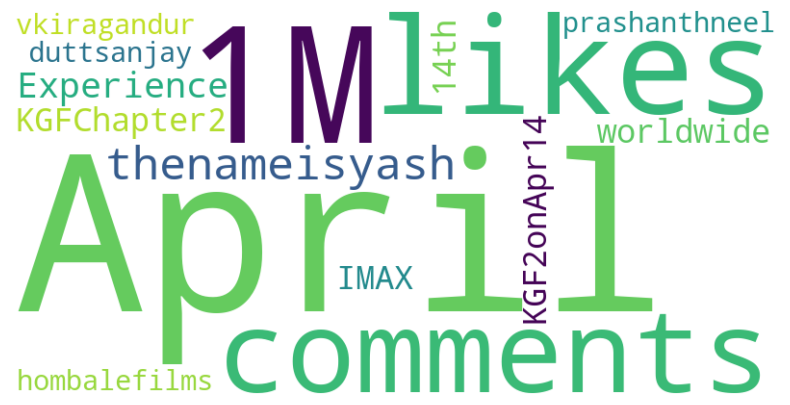

In [27]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Instagram post URL
post_url = 'https://www.instagram.com/p/CcANpJlKlso/?igsh=aDZ3aDFpYWtwNGNu'

# Make a GET request to the URL
response = requests.get(post_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract text from the post
    post_text = ""
    for p_tag in soup.find_all('meta', property='og:description'):
        post_text += p_tag.get('content') + "\n"

    print("Extracted text:", post_text)

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(post_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

else:
    print("Failed to retrieve the page. Status code:", response.status_code)


Interpretation:

Word Cloud:
This section demonstrates the creation of a word cloud from the Instagram post text. Word clouds are a visually appealing way to represent the most frequent words in a text, with the size of each word corresponding to its frequency. This can quickly give a visual overview of the main themes or topics in the text.